# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [11]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

# Obtain Python Version

import sys
print sys.version_info

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


sys.version_info(major=2, minor=7, micro=13, releaselevel='final', serial=0)


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [12]:
# TODO: Total number of records
n_records = data.shape[0] # it is better than data.count() because it includes NA and NaN records too

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == '>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/float(n_records)*100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

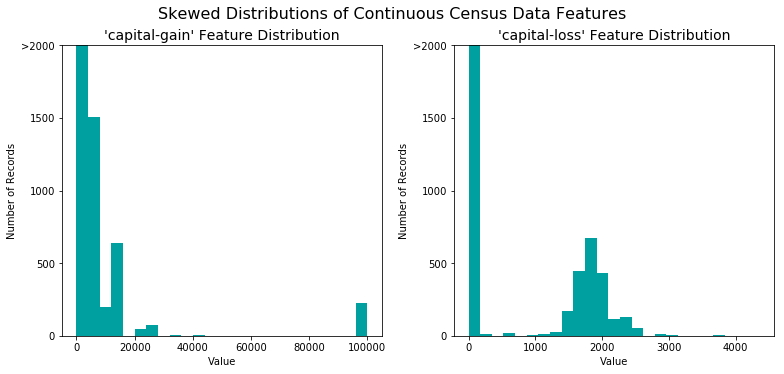

In [13]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

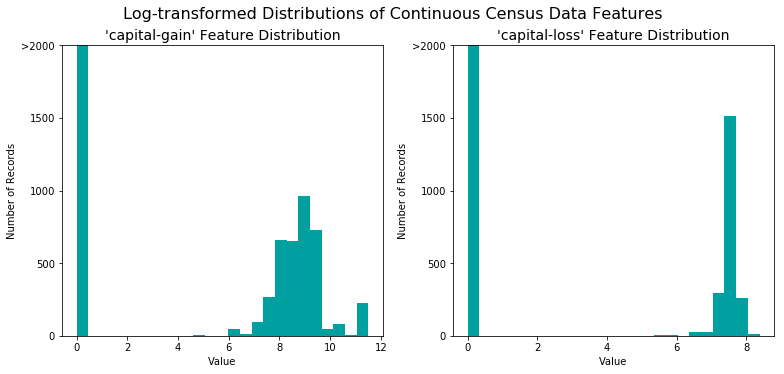

In [14]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [15]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [16]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
categorical = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

features_final = pd.get_dummies(features_log_minmax_transform,columns = categorical)
display(features_final.head(n = 5))

# TODO: Encode the 'income_raw' data to numerical values
'''numerical = ['income']
income_df = pd.DataFrame(data = income_raw)
income_df = pd.get_dummies(income_df,columns = numerical)
display(income_df.head(n = 5))'''

print "income raw type ",type(income_raw)
display(income_raw.head(n = 5))
income_raw[income_raw == '<=50K'] = 0
display(income_raw.head(n = 5))

display(income_raw.head(n = 5))
income_raw[income_raw == '>50K'] = 1
display(income_raw.head(n = 5))

print income_raw.describe(include='all')

income = income_raw
print "income type ",type(income)
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


income raw type  <class 'pandas.core.series.Series'>


0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0    0
1    0
2    0
3    0
4    0
Name: income, dtype: object

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: object

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0    0
1    0
2    0
3    0
4    0
Name: income, dtype: object

count     45222
unique        2
top           0
freq      34014
Name: income, dtype: int64
income type  <class 'pandas.core.series.Series'>
103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'mar

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [17]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 40)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])
print "y_train type ",type(y_train)
print "y_test type ",type(y_test)
print "X_train type ",type(X_train)


Training set has 36177 samples.
Testing set has 9045 samples.
y_train type  <class 'pandas.core.series.Series'>
y_test type  <class 'pandas.core.series.Series'>
X_train type  <class 'pandas.core.frame.DataFrame'>


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [18]:

TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP/float(income.count())
recall = TP/float(TP+FN)
precision = TP/float(TP+FP)
beta=0.5
# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
fscore = (1 + beta**2) * (precision * recall) / float(((beta**2 * precision) + recall))

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

# **Answer: **
I used a few sources from the web including:
http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/ This blog was quite useful for my discussion below for all my algorithm selections and responses.
https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms
http://machinelearningmastery.com/an-introduction-to-feature-selection/

Given the nature of the problem I discarded:
- Ensemble methods, SGDC: due to their complexity to this problem and
- K-NearestN: Becuase it may overfit and, in my view, it may miss predictions when there's new data not close to its model bounds.

I kept SVM because I am intrigued on its practial applications

_**What I know about my dataset so far:**_

By this point this is what we/I know about the data:
* My Outcome is expected to be a **binary** classifier. This also means I know what the outcome(label)associated with each sample, hence, supervised algorithms shall be used.
    *It is also expected to obtain an accurate result
    * Outcome is **unbalanced/skewed** i.e. There are only ~25% of samples with salaries greater than 50K
* My feature set is made of **categorical and numerical features**
    * Categorical Values have been "hot-coded"
    * Numerical values have been _**normalized**_
    * Capital Gain and Capital Loss were also **LOG-Transformed** because they showed **highly skewed**
* I would **not** considered this a large data set since it is 45k rows x 14 features/columns (103 features after encoding). It was easily managed by PC's RAM.
* With the information available is difficult to assess whether classes/features are separated linearly or if features are independent

### GAUSSIAN NAIVES

**•Describe one real-world application in industry where the model can be applied.**
This algorithm is widely used for text recognition, identify whether emails are spam or not and even image recognition. https://www.quora.com/In-what-real-world-applications-is-Naive-Bayes-classifier-used


**•What are the strengths of the model; when does it perform well?**
It is simple and easy to implement, yet powerful
It is a high bias/low variance algorithm, hence, it tends to not overfit.
If the feature independence holds true, GNB will converge quicker than other algorithms giving the opportunity to need less training data


**•What are the weaknesses of the model; when does it perform poorly?**
It assumes that attributes are conditionally independent hence P(d1, d2, d3|h) = P(d1|h) * P(d2|H) and so on. Eventhough this is not true in all cases in real life, this algorithm performs really well even when the assumption does not hold true
Also, because it is a high bias/low variance algorithm, it may not provide the best accuracy
It may not work as well in large datasets (compared to otehr algorithms)

**•What makes this model a good candidate for the problem, given what you know about the data?**
Considering that the selection of an algorithm is not a set or straight-forward decision because it depends on competing factors, I'll base my arguments on a more structured response using aids from experts on the mattter (https://docs.microsoft.com/en-us/azure/machine-learning/machine-learning-algorithm-cheat-sheet and
http://scikit-learn.org/stable/tutorial/machine_learning_map)
https://stackoverflow.com/questions/2595176/when-to-choose-which-machine-learning-classifier
https://stackoverflow.com/questions/2595176/when-to-choose-which-machine-learning-classifier
First, my objective is a binary classification because I have _known labeled data_, hence, I'll look into algorithm's for **classification**. Both, Microsoft and Scikit Learn show NB as a potential algorith to use given that I have less than 100k samples. Also, a few other items I considered : 

**Time: **It is a fast algorithm (and simple)
**Accuracy:** It may be accurate for classifications purposes (not necessarily to calculate the probabilities of these classes though)
**Interpretability:** It is relatively simple to explain, but I'd say others are simpler
**Size of Data:** The data set is not large so not an issue
**Number of Parameters:** I purposedely did not consider this so I could compare different algorithm performances. This would give me an idea of the tradeoff between accuracy and performance
**Linearity of Data Assumption:** Although, it is not clear if this data set is linearly separable or not, this algorithm does work well even on the worst case scenario of not linearity
**Features Independence Assumption:** Although, it is not clear if features are independent or not, this algorithm does work well even on the worst case scenario of not independence

### LOGISTIC REGESSION
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part1/
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part2/
**•Describe one real-world application in industry where the model can be applied.**
This algorith can be used as a clasiffication algorithm, but largely his values lies int he fact that it can calculate probabilities of events; it is not intended to calculate or predict numerical values but rather output categories or classes. More closely, examples such as the this Finding Donor project, or predicting if a person will vote for A or B caditate for presidency, predicting an earthquake, etc.
https://www.quora.com/What-are-applications-of-linear-and-logistic-regression

**•What are the strengths of the model; when does it perform well?**
This classifier does not assume conditional independency between features, or them being correlated
If we plan to add more data in the furure, we can update the model relatively easily compared to other classifiers such as Decision Tress and SVMs
Allows the oportunity to provide probabilities i.e. in cases where we may need to update classification thresholds or if we need to provide confidence intervals.
It can be explained to others, and does not need many parameters to tune


**•What are the weaknesses of the model; when does it perform poorly?**
To achieve stable and meaningful and stable results, it may require more data points than other classifiers (https://victorfang.wordpress.com/2011/05/10/advantages-and-disadvantages-of-logistic-regression/)
It can only be used to predict discrete outcome
Outcomes are highky dependednt on the assumptions required for the classifier (presence of outliers, linearity of features) https://stats.stackexchange.com/questions/198067/when-is-logistic-regression-suitable
Logistic regression will work for classification problems where classes are approximately linearly separable. In other words, it would not provide accurate outcomes for classification problems where our feature space requires a curve as opposed to a line as a decision boundary. This may mean that this classifier may not do too well with a large number of features
 
 
**•What makes this model a good candidate for the problem, given what you know about the data?**
https://stackoverflow.com/questions/2595176/when-to-choose-which-machine-learning-classifier
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part1/
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part2/

First, my objective is a binary classification because I have _known labeled data_, hence, I'll look into algorithm's for **classification**. Interstingly in this case, Microsoft shows LR as an option for an algorithm, but SciKit Learn does not; interesting because most sources I found mention to start with simple and reliable algorithms where logistic regression is one of them. Also, a few other items I considered : 

**Time: **It is a fast algorithm (and simple)
**Accuracy:** It is be accurate for classifications purposes and for calculating probabilities for such classes
**Interpretability:** It is simple to explain
**Size of Data:** The data set is not large (but large enough to generate reliable predictions) so not an issue, however, the algorithm can handle large datasets
**Number of Parameters:** I purposedely did not consider this so I could compare different algorithm performances. This would give me an idea of the tradeoff between accuracy and performance
**Linearity of Data Assumption:** Because it is not clear if this data set is linearly separable or not, this algorithm may not perform as well as others selected, but it will be assessed later in this project
**Features Independence Assumption:** Although, it is not clear if features are independent or not, this algorithm does work well even on the worst case scenario of not independence

This algorithm has the added strength of being able to predict unseen data that was not within the training space bounds, hence, augmenting confidence on its results

### DECISION TREES
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part1/
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part2/
**•Describe one real-world application in industry where the model can be applied. **
For instance, in my industry - Wireless Telecom-, it could be used to classify whether a site is reaching capacity limits or not given continuous and categorical features that are measured to monitor the wireless network; similarly, it could help to identify if a site is about to get off air given a trend of alarms raised by the monitoring system. Maybe more simply, deicion trees as a concept facilitate visualizing the decision making process within an organization, hence, allowing decision making based on data.
https://www.quora.com/What-are-some-practical-business-uses-of-decision-trees
http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html


**•What are the strengths of the model; when does it perform well?**
It can work with large number of features
Outcome models are fairly intuitive and easy to explain/understand
Takes into account variable interactions
It works for both categorical and continuous dependent variables https://www.analyticsvidhya.com/blog/2015/08/common-machine-learning-algorithms/
Not influenced by outliers or mising data (to a fair degree)
Does not make assumptions on space distribution
https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

**•What are the weaknesses of the model; when does it perform poorly?**
It is a highle Biased classifier/model(to training set), which means it is very prompt to overfitting if we don't take the correct measures such as using cross validation to ensure its validaty.
May not be accurate when sees new data not in its model
https://stats.stackexchange.com/questions/1292/what-is-the-weak-side-of-decision-trees

**•What makes this model a good candidate for the problem, given what you know about the data?**
https://stackoverflow.com/questions/2595176/when-to-choose-which-machine-learning-classifierDT are suited for classification problems as well, https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part1/
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part2/


First, my objective is a binary classification because I have _known labeled data_, hence, I'll look into algorithm's for **classification**. Also interstingly in this case, Microsoft shows DT as an option for an algorithm, but SciKit Learn does not; interesting because most sources I found mention DT algorithm as good options for classification. Also, a few other items I considered : 

**Time: **It is a fast algorith (and simple)
**Accuracy:** It is be accurate for classifications purposes but not necessarily for calculating probabilities of classes
**Interpretability:** It is simple to explain to non technical people
**Size of Data:** The data set is not large so not an issue, however, the algorithm can handle large datasets including large feature sets
**Number of Parameters:** I purposedely did not consider this so I could compare different algorithm performances. This would give me an idea of the tradeoff between accuracy and performance
**Linearity of Data Assumption:** Although, it is not clear if this data set is linearly separable or not, this algorithm does work well even on the worst case scenario of not linearity
**Features Independence Assumption:** Although, it is not clear if features are independent or not, this algorithm can handle variable interactions

This algorith has the added strength of being able to predict unseen data that was not within the training space bounds, hence, augmenting confidence on its results

### SUPPORT VECOR MACHINES (SVM)
http://www.cs.uky.edu/~jzhang/CS689/PPDM-Chapter2.pdf
https://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/
http://www.cs.cmu.edu/~epxing/Class/10701-10s/Lecture/lecture17.pdf
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part1/
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part2/
https://stackoverflow.com/questions/2595176/when-to-choose-which-machine-learning-classifier
**•Describe one real-world application in industry where the model can be applied.**
While I am not really sure yet (https://arxiv.org/abs/1203.3847) how, SVM, among other applications, can serve for hand-written character recognition

**•What are the strengths of the model; when does it perform well?**
Based on boundary cases
They can manage non linear decision boundaries by projecting the features space into kernel spaces, this allows it to manage large feature spaces
It can handle non-linear feature interactions
It is robust to outliers


**•What are the weaknesses of the model; when does it perform poorly?**
Not an efficient model for large number of interactions
While the ability to find a kernel is useful to linearize the data, finding the right kernel may not be easy
Training Times may be long compared to other models
if data is overlapping (noisy), it may not perform well
It does not directly calculate probabilities

**•What makes this model a good candidate for the problem, given what you know about the data?**

First, my objective is a binary classification because I have _known labeled data_, hence, I'll look into algorithm's for **classification**. Both, Microsoft and Scikit Learn show SVM as a potential algorithms to use for my clasification problem. Also, a few other items I considered : 

**Time: **It is **not** a fast algorithm
**Accuracy:** It is accurate for classifications purposes 
**Interpretability:** Not too simpel to explain without entering into algebra and mathematicals planes
**Size of Data:** The data set is not large so not an issue
**Number of Parameters:** I purposedely did not consider this so I could compare different algorithm performances. This would give me an idea of the tradeoff between accuracy and performance
**Linearity of Data Assumption:** Although, it is not clear if this data set is linearly separable or not, this algorithm does work well even on the worst case scenario of not linearity
**Features Independence Assumption:** Although, it is not clear if features are independent or not, this algorithm does work well even on the worst case scenario of not independence

In this particular case, I think other models may be better considering other variables including training and testing time, but certainly SVM is a strong contender given its strengths as a classifier.


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [19]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 

    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
      '''
    results = {}
    
    # TODO: Fit the learner to the training data using slicing 
    # with 'sample_size' using .fit(training_features[:], training_labels[:])
    beta=0.5
    start = time() # Get start time
    '''print type(X_train)," - ", type(y_train)
    print X_train.shape," - ", y_train.shape
    display(X_train.head(n=5))
    display(y_train.head(n=5))
    print y_train.describe(include='all')'''
    #print X_train.colName.value_counts()
    
    
    
    learner = learner.fit(X_train[:sample_size], list(y_train[:sample_size]))
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
    print "train duration = ", results['train_time']
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test =  learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(list(y_train[:300]),predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(list(y_test),predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(list(y_train[:300]),predictions_train, beta)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(list(y_test),predictions_test, beta)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

36177 - 3617 - 361
Start of the Process ->  1499910080.27
train duration =  0.00300002098083
LogisticRegression trained on 361 samples.
train duration =  0.0189998149872
LogisticRegression trained on 3617 samples.
train duration =  0.328999996185
LogisticRegression trained on 36177 samples.
train duration =  0.0019998550415
GaussianNB trained on 361 samples.
train duration =  0.00799989700317
GaussianNB trained on 3617 samples.
train duration =  0.104000091553
GaussianNB trained on 36177 samples.
train duration =  0.00300002098083
DecisionTreeClassifier trained on 361 samples.
train duration =  0.0250000953674
DecisionTreeClassifier trained on 3617 samples.
train duration =  0.391999959946
DecisionTreeClassifier trained on 36177 samples.


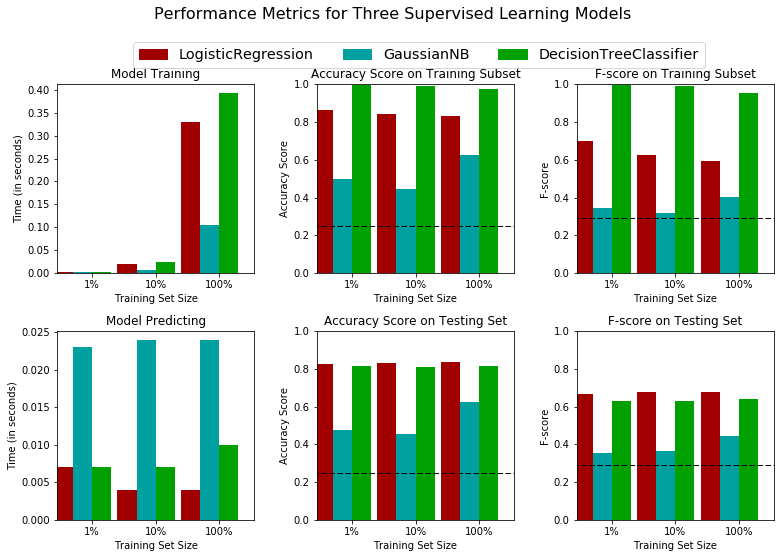

End of the Process ->  1499910081.98


In [20]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = LogisticRegression()
clf_B = GaussianNB()
#clf_C = SVC(C=1.0)
clf_C = DecisionTreeClassifier() #max_depth = 15


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = samples_100/10
samples_1 = samples_100/100
print samples_100,"-",samples_10,"-",samples_1
print "Start of the Process -> ",time()
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        #print samples,"-",clf_name, "i  = ",i
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
#print results," - ",accuracy," - ",accuracy
vs.evaluate(results, accuracy, fscore)
print "End of the Process -> ",time()

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **
Full disclosure: I actually decided on 4 algorithms when I first made my choice, mainly because I have read that some are faster than others, some need more data than others to come up with reliable outcomes. Because of this, I tested LR, GNB, DTC and SVC. It was interesting because initially I had SVC on my list and noticed it did take quite a while to train and test the model. I then decided to change SVC for a DTC. I compared all results outside this notebook, in Power Point, and decided to continue workign with LR, GNB and DTC since they'd would give me a better trade off of Acc, FScore (SVC wasn't much better than others) and running time.

For this particular excercise, I will make my decision solely on the quantifying part of ACC and FSCORE for the testing set although at times this may not be the best solution depending on the objectives and limitations of the analysis. I decided to use LR as my model of choice because it consistently overperformed other models on both ACC and F-SCORE regardless of sample size. DTC had a better Training performance BUT it was "too good to be true" which made me think that DTC might have been overfittign the data. In terms of Prediction and Training Times, I had discarded SVC because it did not provide a real advantage in performace despite its much longer training/prediction times; LR, GSB and DTC, on the had had similar running times so this did not make a difference to me at the end. Also, this is a purely binary class classification problem for which LR is not only well fit for the training data but also for data that the model has not seen yet giving me some confidence for completely new, out of trainning-bound data



### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 
https://codesachin.wordpress.com/2015/08/16/logistic-regression-for-dummies/
http://www.appstate.edu/~whiteheadjc/service/logit/intro.htm
http://machinelearningmastery.com/logistic-regression-for-machine-learning/
https://www.analyticsvidhya.com/blog/2015/08/common-machine-learning-algorithms/

An important point to start with about LR is that unlike Liner Regression, Logistic Regression does not seek to find/predict the numeric value of a variable **BUT** the probability that given certain inputs, outcomes belong to a certain class. The model basically tries to predict for a given set of features' inputs, what our "income" outcome will be (>=50K or <50K). Its training process is relatively simple and it consists on finding the coefficients of the linear combination of the features/variables being considered in the analysis (for instance, for N features, it will calculate N+1 coefficients bo,b1,..,bN); it finds the coefficients by a iterative process that ends when a given training accuracy  or a maximum number of iterations is achieved.

From the prediction point of view, LR is very simple since the model itself is "just" an equation, hence, we only need to type in the input values (for each of the features of variables) in the linear equation and it will provide a probability value that will be used to evaluate if the outcome is the default class or not; if it is higher than 0.5, then the outcome will be the default class, otherwise, it will the other class. For this exercise, these clases are nothing but an income label of ">50k" or "<50k"


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [21]:

# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

beta = 0.5 

# TODO: Initialize the classifier
clf = LogisticRegression(random_state=40)
#clf = SVC(C=1.0,random_state=40)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']}
#parameters = {'C': [.2,.5,1,3],'kernel': ['rbf', 'poly', 'sigmoid']}
#class_weight = ‘balanced’, default: None
#solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}, default: ‘liblinear’
# 'class_weight': ['balanced', 'None'],
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=.5)


# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])
# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()

grid_fit = grid_obj.fit(X_train, list(y_train))

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, list(y_train))).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(list(y_test), predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(list(y_test), predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(list(y_test), best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(list(y_test), best_predictions, beta = 0.5))

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Training set has 36177 samples.
Testing set has 9045 samples.


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8341
F-score on testing data: 0.6793

Optimized Model
------
Final accuracy score on the testing data: 0.8352
Final F-score on the testing data: 0.6825


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|   Metric  | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.2478    |    0.8341       |     0.8352      |
| F-score        |        0.2917    |    0.6793       |     0.6825      |


**Answer: **
The results of the model after optimizing it are slightly lower than the results of the unoptimized model. In particular, the ACC and F-Score of the optimized model were: 237.05% and 133.97% repectively better than in the case of Naive Bayes. 



Also ran it for SVC but results were not better than LR.

Unoptimized model SVC
------
Accuracy score on testing data: 0.8270
F-score on testing data: 0.6657

Optimized Model SVC
------
Final accuracy score on the testing data: 0.8296
Final F-score on the testing data: 0.6724



----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**
From the list of features present in the dataset,  and not lookign at the data relationships (yet), I'd rank my top 5 as:

- workclass: It is first because even if you work a lot of hours, and have studied a lot, if you work for the goverment, generally these positions do not have the highest salaries
-Occupation: Some professions are better paid than others, particularly those related to specialty fields
-Education: it's been shown that people with college titles earn more than those who don't
-Hours-per-week: for some professions (hourly ones), the more hours you work, the more you'll get back home
- Age: low ages earn less than higher ages (up to 55years)
- Not wanting to look sexist or racists, but I have seen studies and during the presidential campaing of 2016, it was much debated that women earn less than men for the same position/responsibilities. It is also debated that African Americans earn less than non-african americans.
https://iwpr.org/issue/employment-education-economic-change/pay-equity-discrimination/
http://www.aauw.org/research/the-simple-truth-about-the-gender-pay-gap/


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

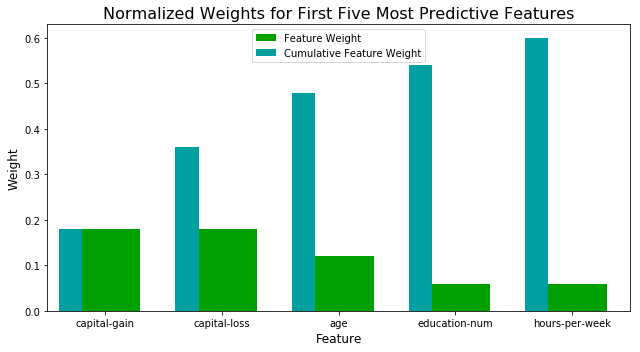

In [24]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier()
model.fit(X_train, list(y_train))

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**
The results are quite different in my top 3 items compared to my initial thoughts, confirming that not always domain knowledge is right (well, I am no expert on this field). Other features such as age, and hours per week were shifted downwards in the importance level, and my education level was not important, rather the number of years in education was the important one.
Quite honestly, I did not understand how capital gains was being measured so did not consider them initially; researching a bit on the cesus.gov website I hoped to find a detailed definition of them, but did not (https://www.census.gov/cps/data/incdef.html). In this case, I'll make a educated guess: Capital gain or losses will be more prevalent during the most productive years of people because they may: 1) own 401K with employers or forms of retirement that produce capital gain/losses or 2) own homes (rental properties) that can also generate them. When looking at the problem from this angle, it actually does make a lot of sense that the capital gain/losses are a good indicator for those with higher salaries since these these are the individuals who would most likely have a good/stable economic position.
Similarly, it was interesting to see that Education level was not in the top 5 but Education-Num for the number of years each individual has been in the education system. This feature I can't really explain since in my experience, there might be people who spends lots of years studying because they fail classes and register them again.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [25]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, list(y_train))

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(list(y_test), best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(list(y_test), best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(list(y_test), reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(list(y_test), reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8352
F-score on testing data: 0.6825

Final Model trained on reduced data
------
Accuracy on testing data: 0.7989
F-score on testing data: 0.5903


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**
Accuracy and F-Scores certainly decreased or were affected by the decision of only using five features from the feature set. ACC dropped by 4.34% which is not as much, however, F-Score dropped by 13.5% taking it to the high 0.5's F-Scores. Running Time, given the model I selected, was not an issue or having 5 features did not represent an noticeable advantage on training/testing durations.
Having said this, in order to maintain F-Scores on high 0.6's, I would still train my model using all features despite its "longer" training/testing durations.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.